**Universidade Federal do Pará**

---

> Aplicando PNL e Modelos de Predição

In [1]:
# importando as bibliotecas
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
# importação da base de dados
dataset = pd.read_csv('../dataset/normalized-hambre-rating-database.csv')
dataset

,quality_rating,waiting_time_rating,store_service_rating,comment_rating,name_store,niche,city
0,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Companhia da Pizza,Pizzaria,Cametá
1,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Companhia da Pizza,Pizzaria,Cametá
2,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Companhia da Pizza,Pizzaria,Cametá
3,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Companhia da Pizza,Pizzaria,Cametá
4,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Companhia da Pizza,Pizzaria,Cametá
...,...,...,...,...,...,...,...
901,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Restaurante e Pizzaria Terrazzo Palace,Restaurante,Cametá
902,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Restaurante e Pizzaria Terrazzo Palace,Restaurante,Cametá
903,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Restaurante e Pizzaria Terrazzo Palace,Restaurante,Cametá
904,Muito satisfeito,Muito satisfeito,Muito satisfeito,Sem comentário,Restaurante e Pizzaria Terrazzo Palace,Restaurante,Cametá


# Processamento de Linguagem Natural (PNL)

In [ ]:
# codificação de variáveis

In [8]:
# Criando a nuvem de palavras
documents = []
for _, row in dataset.iterrows():
    quality_rating = row['quality_rating']
    waiting_time_rating = row['waiting_time_rating']
    store_service_rating = row['store_service_rating']
    comment_rating = row['comment_rating']
    name_store = row['name_store']
    niche = row['niche']
    city = row['city']
    documents.append(f"{quality_rating} {waiting_time_rating} {store_service_rating} {comment_rating} {name_store} {niche} {city}")

documents

['Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Sem comentário Companhia da Pizza Pizzaria Cametá',
 'Muito satisfeito Muito satisfeito Muito satisfeito Se

In [9]:
# Aplicando processamento de linguagem natural (PNL) convertendo em uma representação vetorial TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

In [10]:
# Definindo a variável de saida
y = dataset['quality_rating']

In [11]:
# codificando as variáveis de saída
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Treinamento e Teste

In [12]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo Random Forest

In [13]:
# importando bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [14]:
# criando modelo random forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# fazendo a previsão dos conjuntos de teste
y_pred_RF = random_forest.predict(X_test)

In [16]:
# relatório de desempenho do modelo Random Forest
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.88      0.88         8
           2       0.95      1.00      0.97       242
           3       0.86      1.00      0.92         6
           4       1.00      0.27      0.42        15

    accuracy                           0.95       272
   macro avg       0.74      0.63      0.64       272
weighted avg       0.95      0.95      0.94       272



/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lacienemelo/Documents/developed-software/python-dev/virtual-environment/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

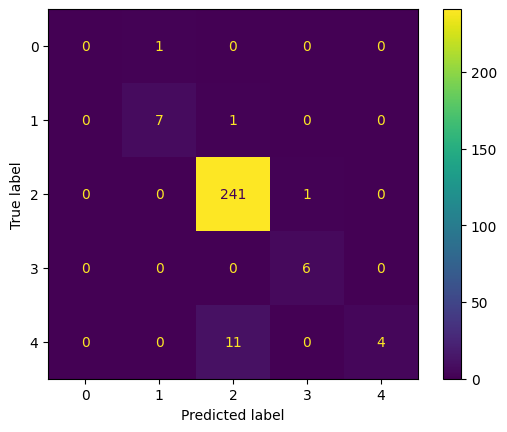

In [17]:
# Crie a matriz de confusão
confMatrixRF = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_RF))
confMatrixRF.plot()